In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scipy

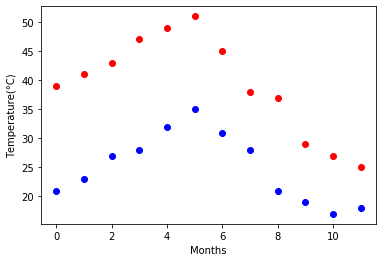

In [43]:
Max =np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min =np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
Months=np.arange(12)
plt.plot(Months,Max,'o',color='red')
plt.plot(Months,Min,'o',color='blue')
plt.xlabel("Months")
plt.ylabel("Temperature(°C)")
plt.show()

In [41]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ampl*np.cos((times+time_offset)*1.8*np.pi/times.max()))

res_max,cov_max=optimize.curve_fit(yearly_temps,Months,Max,[40,20,0])
res_min,cov_min=optimize.curve_fit(yearly_temps,Months,Min,[-40,20,0])

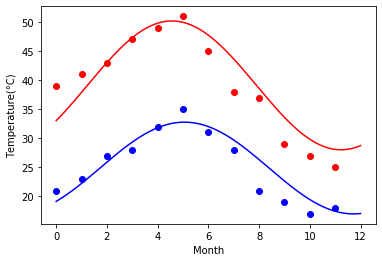

In [42]:
days=np.linspace(0,12,num=365)
plt.figure()
plt.plot(Months,Max,'o',color='red')
plt.plot(days,yearly_temps(days,*res_max),'r-')
plt.plot(Months,Min,'o',color='blue')
plt.plot(days,yearly_temps(days,*res_min),'b-')
plt.xlabel('Month')
plt.ylabel('Temperature(°C)')

plt.show()

# Matplotlib

In [2]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic=pd.read_csv(url)
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Create a pie chart presenting the male/female proportion

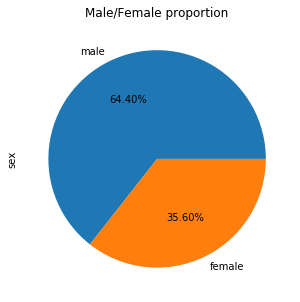

In [15]:
pi=titanic['sex'].value_counts()
ax1=pi.plot.pie(autopct="%.2f%%",figsize=(5,5))
ax1.set_title("Male/Female proportion")
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

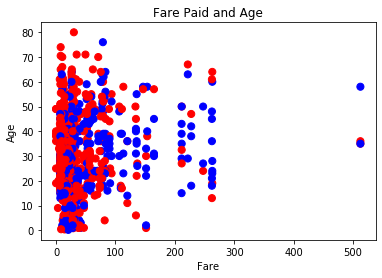

In [4]:
colors={'male':'red','female':'blue',np.nan:'black'}
ax2=titanic.plot.scatter('fare','age',c=titanic['sex'].apply(lambda x:colors[x]),s=50)
ax2.set_title('Fare Paid and Age')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
plt.show()